## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

In [11]:
#reading the data generated from CNN2 notebook
X_train = pd.read_csv('/content/drive/MyDrive/AI for CS/Datasets/X_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/AI for CS/Datasets/X_test.csv')
y_train = pd.read_csv('/content/drive/MyDrive/AI for CS/Datasets/y_train.csv')
y_test = pd.read_csv('/content/drive/MyDrive/AI for CS/Datasets/y_test.csv')

In [12]:
#Add a third dimension to the data
def transform_data(X):
  new_X = []
  for i in range(X.shape[0]):
    new_X.append(X.iloc[i].values.reshape(1,81))
  return np.array(new_X)

In [13]:
#Add a third dimension to the labels
def transform_label(y):
  new_y = []
  for i in range(y.shape[0]):
    new_y.append(y.iloc[i].values.reshape(1,11))
  return np.array(new_y)

In [15]:
lstm_tr = transform_data(X_train)
lstm_te = transform_data(X_test)

In [9]:
from tensorflow import keras

In [10]:
#loading the lstm model
lstm_model = keras.models.load_model('/content/drive/MyDrive/AI for CS/models/lstm.h5')

In [17]:
#Getting class predictions for training and testing
lstm_train = lstm_model.predict(lstm_tr)
lstm_test = lstm_model.predict(lstm_te)

In [18]:
#Restoring the normal shape for the labels and removing the third dim
lstm_train = lstm_train.reshape((lstm_train.shape[0], lstm_train.shape[2]))
lstm_test = lstm_test.reshape((lstm_test.shape[0], lstm_test.shape[2]))

In [22]:
#Getting the index of max probability as the model's prediction
lstm_tr_pred = [np.argmax(lstm_train[i]) for i in range(lstm_train.shape[0])]
lstm_te_pred = [np.argmax(lstm_test[i]) for i in range(lstm_test.shape[0])]

In [55]:
#Getting the index with the number 1 as true label
y_train = [np.argmax(y_train.iloc[i]) for i in range(y_train.shape[0])]

In [24]:
#Getting the index with the number 1 as true label
y_test = [np.argmax(y_test.iloc[i]) for i in range(y_test.shape[0])]

In [95]:
#Evaluating the preformance with precision, recall, f1-score and accuracy
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, accuracy_score
fscore_lstm = f1_score(y_test, lstm_te_pred, average= 'macro')
precision_lstm = precision_score(y_test, lstm_te_pred, average= 'macro')
recall_lstm = recall_score(y_test, lstm_te_pred, average= 'macro') 
accuracy_lstm = accuracy_score(y_test, lstm_te_pred)

In [88]:
#Adding the preformance to dataframe
performance = {'precision': [precision_lstm], 'recall': [recall_lstm], 'f1_score': [fscore_lstm], 'classifier': 'LSTM'}
performance_df = pd.DataFrame(data= performance)

In [96]:
print(accuracy_lstm)
print(fscore)
print(precision_lstm)
print(recall_lstm)

0.6961667846671387
0.6773950348998947
0.7428504186232743
0.7162511746094276


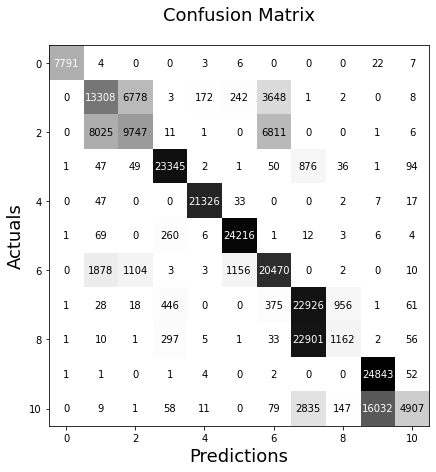

In [107]:
#Plotting the confusion matrix for thr LSTM model
conf_matrix_lstm = confusion_matrix(y_test, lstm_te_pred)
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat= conf_matrix_lstm, figsize= (7, 7), cmap= plt.cm.binary)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [38]:
#loading the cnn model
cnn_model = keras.models.load_model('/content/drive/MyDrive/AI for CS/models/cnn_model.h5')

In [41]:
#obtaining the class predictions for train and test sets
cnn_train = cnn_model.predict(X_train)
cnn_test = cnn_model.predict(X_test)

In [42]:
#Getting the index of the largest probability as final predicition
cnn_tr_pred = [np.argmax(cnn_train[i]) for i in range(cnn_train.shape[0])]
cnn_te_pred = [np.argmax(cnn_test[i]) for i in range(cnn_test.shape[0])]

In [48]:
#Evaluating the preformance of the model
cnn_fscore = f1_score(y_test, cnn_te_pred, average= 'macro')
cnn_precision = precision_score(y_test, cnn_te_pred, average= 'macro')
cnn_recall = recall_score(y_test, cnn_te_pred, average= 'macro')

In [89]:
#The preformance is being added to the dataframe
performance = {'precision': cnn_precision, 'recall': cnn_recall, 'f1_score': cnn_fscore, 'classifier': 'CNN'}
performance_df = performance_df.append(performance, ignore_index=True)

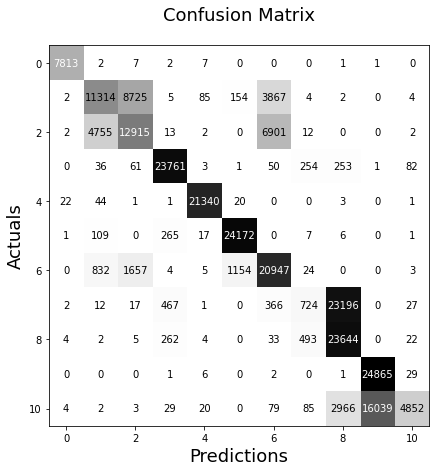

In [108]:
#The confusion matrix for the CNN
conf_matrix_cnn = confusion_matrix(y_test, cnn_te_pred)
fig, ax = plot_confusion_matrix(conf_mat= conf_matrix_cnn, figsize= (7, 7), cmap= plt.cm.binary)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [56]:
#Making new data from the LSTM and CNN predictions
X_train_full = pd.DataFrame(cnn_tr_pred)
X_train_full['LSTM'] = lstm_tr_pred

In [69]:
#MAking test data for evaluation using LSTM and CNN predcitions
X_test_full = pd.DataFrame(cnn_te_pred)
X_test_full['LSTM'] = lstm_te_pred

In [53]:
from sklearn.linear_model import LogisticRegression

In [68]:
#Using Logisitc Regression for the final prediction
LR = LogisticRegression(solver= 'newton-cg', penalty= 'l2', C= 0.7)
LR.fit(X_train_full, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


LogisticRegression(C=0.7, solver='newton-cg')

In [71]:
#Using the logisitc regression model for testing
pred_lr = LR.predict(X_test_full)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [72]:
#Checking the preformance of the Logisitc Regression along with LSTM and CNN outputs
fscore_lr = f1_score(y_test, pred_lr, average= 'macro')
precision_lr = precision_score(y_test, pred_lr, average= 'macro')
recall_lr = recall_score(y_test, pred_lr, average= 'macro')

In [90]:
#Evaluating the performance Logistic Regression
performance = {'precision': precision_lr, 'recall': recall_lr, 'f1_score': fscore_lr, 'classifier': 'Ensemble LR'}
performance_df = performance_df.append(performance, ignore_index=True)

In [77]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=0)
DT.fit(X_train_full, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


DecisionTreeClassifier(random_state=0)

In [78]:
#Using Decision Tree to group the predictions
pred_dt = DT.predict(X_test_full)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [79]:
#Checking the preformance
fscore_dt = f1_score(y_test, pred_dt, average= 'macro')
precision_dt = precision_score(y_test, pred_dt, average= 'macro')
recall_dt = recall_score(y_test, pred_dt, average= 'macro')

In [91]:
performance = {'precision': precision_dt, 'recall': recall_dt, 'f1_score': fscore_dt, 'classifier': 'Ensemble DT'}
performance_df = performance_df.append(performance, ignore_index=True)

In [111]:
performance_df

,precision,recall,f1_score,classifier
0,0.742850,0.716251,0.677395,LSTM
1,0.750424,0.725965,0.683749,CNN
2,0.693766,0.708138,0.638980,Ensemble LR
3,0.753700,0.726462,0.683457,Ensemble DT


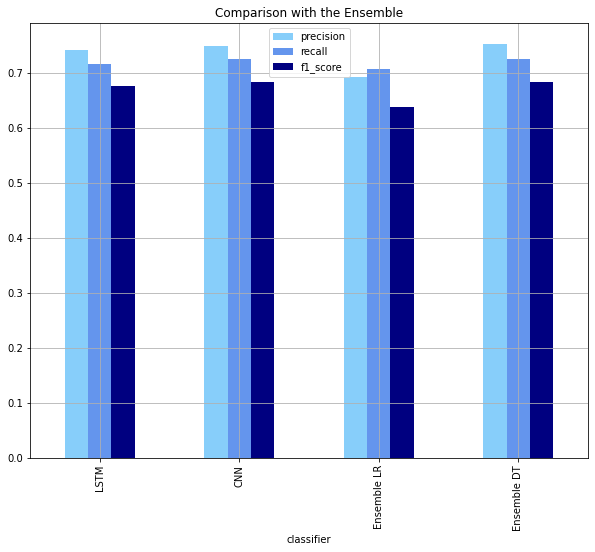

In [110]:
#Comapring the LSTM CNN single models with ensemble with Logisitc Regression and Decision Tree
m_color = ['lightskyblue', 'cornflowerblue', 'navy']
performance_df.plot(x='classifier', kind='bar', title='Comparison with the Ensemble', 
                        color= m_color, grid=  True, figsize= (10, 8))